# Predicting the likelihood of marketing engagement with Python

In [1]:
# importing the neccesary librabry and loading the datase
import pandas as pd
df = pd.read_csv("C:\\Users\\User\\Desktop\\data_science bootcamp\\Marketing Analytics\\Datasets\\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [2]:
df.shape

(9134, 24)

In [3]:
# returns the first five values of the dataset
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


As you might have noticed, this is the same dataset that we used in the previous chapter, where we conducted customer analytics.

**bold text**## Variable encoding

### Response variable encoding

In [4]:
# The first thing we are going to do is encode the response variable Response.We are going to encode Yes values with 1s and No values with 0s. 
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [5]:
#In order to get the overall response or engagement rate using this newly-created column, you can use the following code:

df['Engaged'].mean()*100

14.320122618786948

In [6]:
# here we checked the summary of the dataset
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


### Continuous Variables

In [7]:
 # here we created a new variable called continuous_features and stored the continous variables in it.
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

### Categorical variable encoding

In [8]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

In [9]:
df[columns_to_encode]

,Sales Channel,Vehicle Size,Vehicle Class,Policy,Policy Type,EmploymentStatus,Marital Status,Education,Coverage
0,Agent,Medsize,Two-Door Car,Corporate L3,Corporate Auto,Employed,Married,Bachelor,Basic
1,Agent,Medsize,Four-Door Car,Personal L3,Personal Auto,Unemployed,Single,Bachelor,Extended
2,Agent,Medsize,Two-Door Car,Personal L3,Personal Auto,Employed,Married,Bachelor,Premium
3,Call Center,Medsize,SUV,Corporate L2,Corporate Auto,Unemployed,Married,Bachelor,Basic
4,Agent,Medsize,Four-Door Car,Personal L1,Personal Auto,Employed,Single,Bachelor,Basic
...,...,...,...,...,...,...,...,...,...
9129,Web,Medsize,Four-Door Car,Personal L1,Personal Auto,Employed,Married,Bachelor,Basic
9130,Branch,Medsize,Four-Door Car,Corporate L3,Corporate Auto,Employed,Divorced,College,Extended
9131,Branch,Medsize,Four-Door Car,Corporate L2,Corporate Auto,Unemployed,Single,Bachelor,Extended
9132,Branch,Large,Four-Door Car,Personal L2,Personal Auto,Employed,Married,College,Extended


In [10]:
# we create dummy variables for each category of individual categorical variables, using the get_dummies function from the pandas package. 
categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)

In [11]:
df[categorical_features]

,Sales.Channel.Agent,Sales.Channel.Branch,Sales.Channel.Call Center,Sales.Channel.Web,Vehicle.Size.Large,Vehicle.Size.Medsize,Vehicle.Size.Small,Vehicle.Class.Four-Door Car,Vehicle.Class.Luxury Car,Vehicle.Class.Luxury SUV,...,Marital.Status.Married,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium
0,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
9130,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
9132,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


### Encoding Gender

In [44]:
# we are going to create one variable that contains information about the gender of a given record.
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)
categorical_features.append('Is.Female')

In [46]:
df['Is.Female']

0       1
1       1
2       1
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Is.Female, Length: 9134, dtype: int64

## Building predictive models
### All features and response

In [13]:
# cleaning up in our data. Take a look at the following code: 
all_features = continuous_features + categorical_features
response = 'Engaged'


In [14]:
# As you can see from this code, we are creating a new DataFrame sample_df, which contains all the features, all_features
# and the response variable, response. Then, we are cleaning up the column and feature names by replacing all the spaces 
# in the names with dots. After these cleanups, DataFrame sample_df

sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

In [15]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,1,0,0,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,1,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,0,...,1,0,0,0,0,1,0,0,0,0


### Train and test 
Now that we have a sample set that we can train and test our machine learning models with, let's split this sample set into two subsets—one for training the
models and another for testing and evaluating the trained models.

In [16]:
#  scikit-learn, has a function that splits a given sample set into train and test sets. Take a look at the following code:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features],sample_df[response], test_size=0.3)

In [17]:
sample_df.shape

(9134, 51)

In [18]:
x_train.shape

(6393, 50)

In [19]:
x_test.shape

(2741, 50)

## Random forest model

In [20]:
# importing the random forest classifier using the following code:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# we create a random forest classifier using the following code:
rf_model = RandomForestClassifier()

### Training a random forest model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Training a random forest model using scikit-learn is simple. Take a look at the following code:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

In [24]:
rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [25]:
# Using the estimators_ attribute, you can retrieve the individual trees that are built within the forest. Take a look at the following output:
rf_model.estimators_ 

[DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=436687223),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=995276989),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=284867166),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=851950334),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=409394975),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1722102715),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1538321928),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=241591406),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=542268335),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1325226318),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=

As you can see from this output, the estimators_ attribute returns a list of subestimators, which are decision trees. With this information, you can simulate
what each of these sub-estimators predicts for each input.

In [26]:
# the following code shows how you can get the predictions from the first subestimator in the forest:
rf_model.estimators_[0].predict(x_test)[:30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
rf_model.estimators_[1].predict(x_test)[:30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
rf_model.estimators_[2].predict(x_test)[:30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
rf_model.estimators_[3].predict(x_test)[:30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
rf_model.estimators_[4].predict(x_test)[:30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Feature Importance

In [31]:
# Other useful information that we can gain from the trained RandomForestClassifier object is the feature importances,
# with which we can understand the importance or 
# the impact of each feature on the final predictions. You can get the feature importances for each feature using the following code:

rf_model.feature_importances_

array([0.05702153, 0.08543194, 0.05401664, 0.03302471, 0.05193178,
       0.0131174 , 0.02021452, 0.07739711, 0.05288817, 0.00609508,
       0.00510333, 0.00504694, 0.00764381, 0.00757984, 0.00928287,
       0.00405851, 0.00033317, 0.0016724 , 0.00541373, 0.00593505,
       0.00378842, 0.00031344, 0.00117389, 0.00148225, 0.0024882 ,
       0.00147253, 0.00252268, 0.0012902 , 0.0007677 , 0.00284377,
       0.001302  , 0.00138338, 0.00257597, 0.00580116, 0.02805281,
       0.00787185, 0.29964063, 0.02351001, 0.03163225, 0.01932031,
       0.01543423, 0.00422059, 0.00571721, 0.0034969 , 0.00586083,
       0.00651244, 0.00430029, 0.00439689, 0.00307452, 0.00454412])

In [32]:
# In order to associate these feature importances with the corresponding features, you can use the following code:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_,all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
36,0.299641,EmploymentStatus.Retired
1,0.085432,Income
7,0.077397,Total.Claim.Amount
0,0.057022,Customer.Lifetime.Value
2,0.054017,Monthly.Premium.Auto
8,0.052888,Sales.Channel.Agent
4,0.051932,Months.Since.Policy.Inception
3,0.033025,Months.Since.Last.Claim
38,0.031632,Marital.Status.Divorced
34,0.028053,EmploymentStatus.Employed


### Evaluating a classification model


In [33]:
# importing the neccesary library
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [34]:
# Before we evaluate the model performance, we need the model prediction results. In order to have the random forest model we have 
# built in the previous section to make predictions on our dataset, we can simply use the predict function of the model. 
# Take a look at the following code:

in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [35]:
# With these prediction results, we are going to evaluate how well our random forest model performs in the train and test sets. 
# The following code shows how we can use the accuracy_score, precision_score, and recall_score functions in the scikit-learn package:
# accuracy_score(actual, predictions)
# As you can see from this code, the accuracy_score, precision_score, and recall_score functions all take two parameters—truth labels
# and predicted labels. Take a look at the following output:

print('In_Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out_of_Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In_Sample Accuracy: 0.8769
Out_of_Sample Accuracy: 0.8778


In [36]:
print('In_Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out_of_Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In_Sample Precision: 0.9857
Out_of_Sample Precision: 0.9310


In [37]:
print('In_Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out_of_Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In_Sample Recall: 0.1495
Out_of_Sample Recall: 0.1403


This output gives us a brief overview of how well our model performs at predicting the responses. For the train set, the accuracy of the overall prediction was 87%, meaning the model prediction was correct for about 0.8739 of the time. For the test set, the accuracy of the overall prediction was 0.8803, which is roughly on the same line with the prediction accuracy within the train set. You can also see that the precision for in-sample and out-of-sample predictions were 0.9859 and 1.0000 respectively, and the recalls were 0.1483 and 0.0989. Due to the randomness and the different hyperparameters you might have used, you can get different results.


## ROC & AUC

In [38]:
from sklearn.metrics import roc_curve, auc

In [39]:
#  In order to compute the ROC and AUC using these functions, we need to first get the prediction probabilities from our random forest model.
# The following code shows how we can get the random forest model's prediction probabilities for both the train and test sets:

in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]


In [40]:
# With these predicted probabilities of the positive class for both the train and test sets, we can now compute the ROC curve and AUC. 
# Let's first take a look at how we can compute the ROC curve using the roc_curve function in the following code:

in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train,
in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test,
out_sample_preds)


In [41]:
# As you can see from this code, the auc function takes two parameters—fpr and tpr. Using the previously calculated fpr and tpr values
# from the roc_curve function, we can easily compute the AUC numbers for both the train and test sets. The output looks as follows

in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8765
Out-Sample AUC: 0.8296


If you see a big gap between these two numbers, it is a sign of overfitting and you should try to address it by pruning the trees in the forest by tuning the hyperparameters, such as the maximum depth and minimum number of samples to split.

The last thing we are going to look at for evaluating machine learning models is the actual ROC curve. 

In [42]:
import matplotlib.pyplot as plt

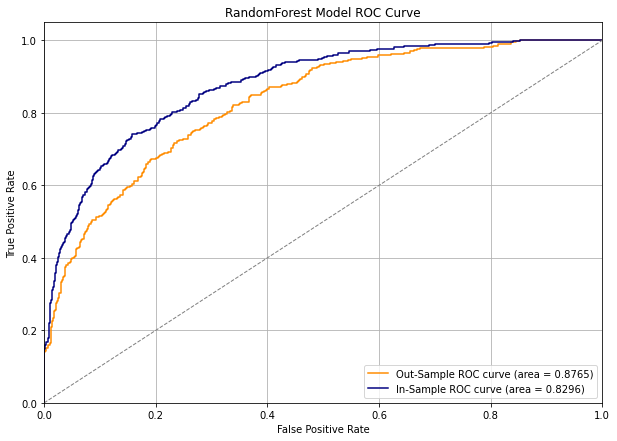

In [43]:
# we can plot the actual ROC curves using the matplotlib package. Take a look at the following code:


plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

In [1]:
import numpy as np
from PIL import Image
from IPython.display import display

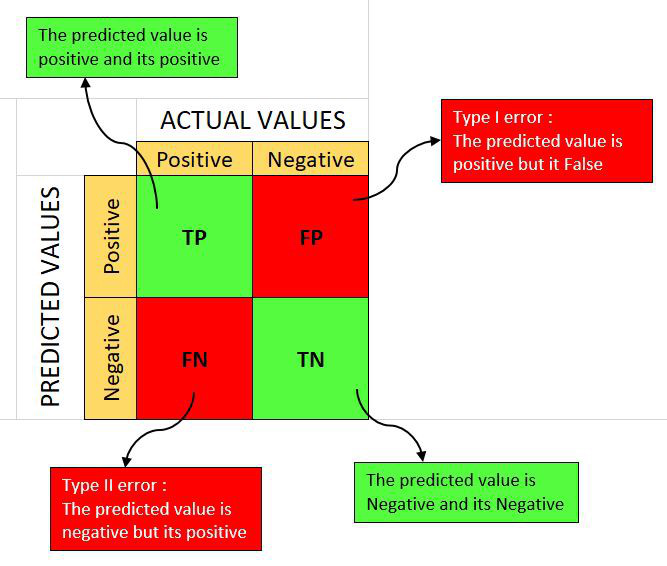

In [2]:
im=Image.open('1_3yGLac6F4mTENnj5dBNvNQ.jpeg')
display(im)
array=np.array

The larger the gap between the in-sample ROC curve and the out-sample ROC curve, 
the more the model is overfitting to the train set and fails to
generalize the findings for unforeseen data. A normal random classifier has an AUC of 0.5,
and our AUC is 0.8 so any classifier withan AUC higher than 0.5 suggests that the model 
performs better than random predictions which means our model performs better.